### PROBLEM STATEMENT-PREIDICTING THE AIR QUALITY OF RELATIVE HUMIDITY
        -Humans are very sensitive to humidity, as the skin relies on the air to get rid of moisture. The process of sweating is your body's attempt to keep cool and maintain its current temperature. If the air is at 100-percent relative humidity, sweat will not evaporate into the air. As a result, we feel much hotter than the actual temperature when the relative humidity is high. If the relative humidity is low, we can feel much cooler than the actual temperature because our sweat evaporates easily, cooling us off. For example, if the air temperature e is 75 degrees Fahrenheit (24 degrees Celsius) and the relative humidity is zero percent, the air temperature feels like 69 degrees Fahrenheit (21 C) to our bodies. If the air temperature is 75 degrees Fahrenheit (24 C) and the relative humidity is 100 percent, we feel like it's 80 degrees (27 C) out

### Objective:
So we will predict the Relative Humidity of a given point of time based on the all other attributes affecting the change in RH.

### LOADING DATA

In [3]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
#VERSION CHECKING
print(pd.__version__)
print(np.__version__)
print(sns.__version__)


0.25.1
1.16.5
0.9.0


In [3]:
#reading the dataset by using read_excel
data=pd.read_excel("AirQualityUCI.xlsx")
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [4]:
data.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [5]:
#checking the information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
Date             9357 non-null datetime64[ns]
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null int64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
dtypes: datetime64[ns](1), float64(12), int64(1), object(1)
memory usage: 1.1+ MB


In [6]:
#datatypes of data
data.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [7]:
#checking the max,min,count by using describe function
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [8]:
# missing values
data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

<BarContainer object of 15 artists>

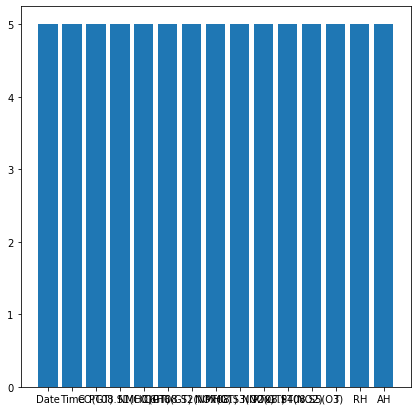

In [9]:
#checking the barplot of every input value
plt.figure(figsize=(7,7))
plt.bar(data.columns,height=5)

### DATA CLEANING AND VISULIZATION

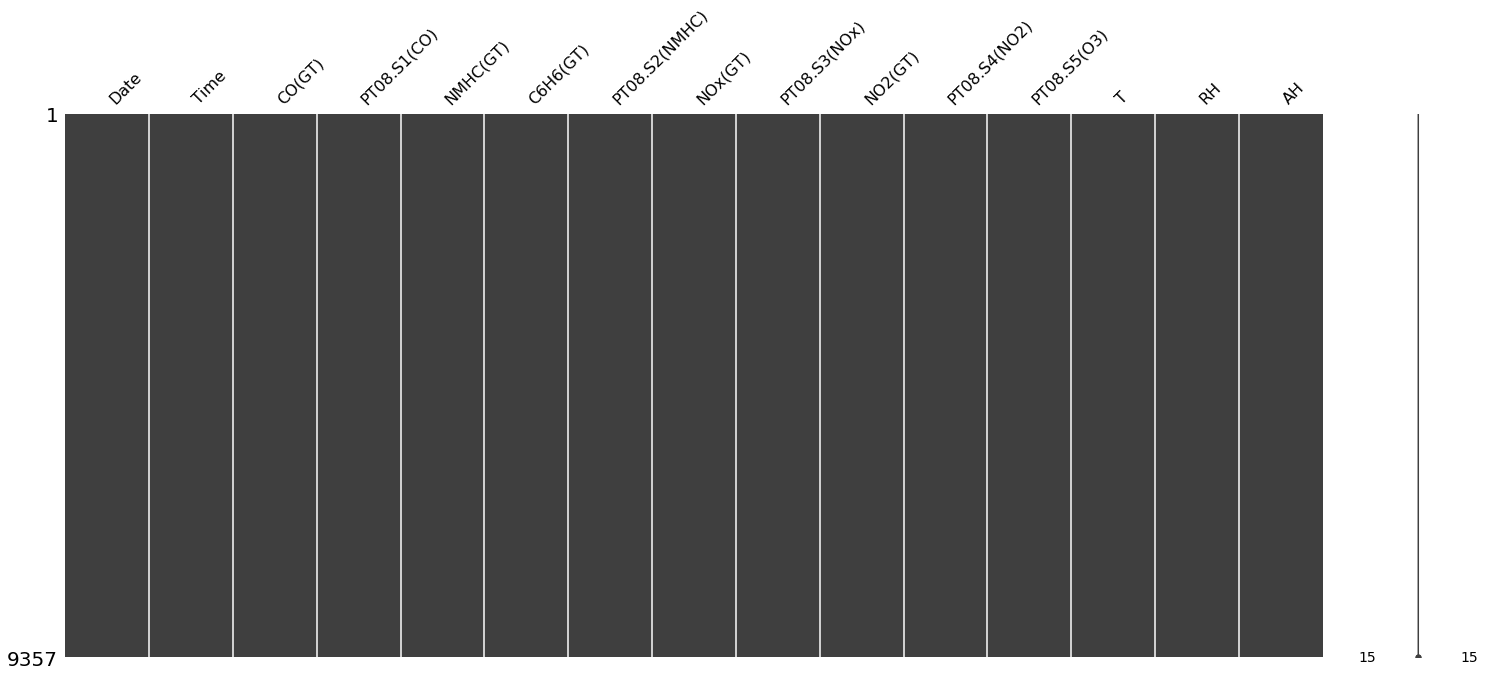

In [10]:
## visualizing the missing values
import missingno as msno
msno.matrix(data)

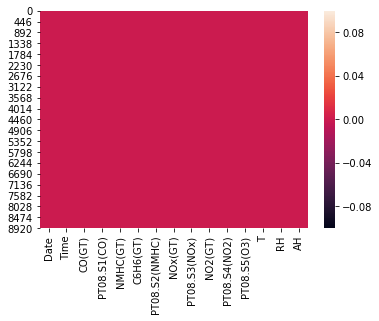

In [11]:
#checking missing values  using heatmap
sns.heatmap(data.isna())

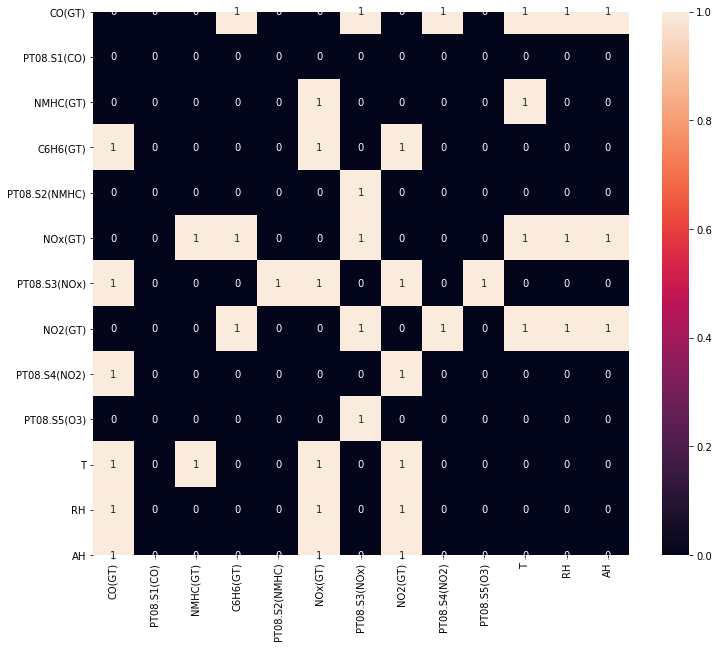

In [12]:
#finding out corelation 
plt.figure(figsize=(12,10))
sns.heatmap(data.corr()<0,annot=True)

In [13]:

d=data[data[data.columns[2:15]]<0]
d

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,NaT,NaN,NaN,NaN,-200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9353,NaT,NaN,NaN,NaN,-200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9354,NaT,NaN,NaN,NaN,-200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9355,NaT,NaN,NaN,NaN,-200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data.replace(d,np.nan,inplace=True)

In [15]:
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,NaN,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,NaN,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,NaN,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,NaN,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


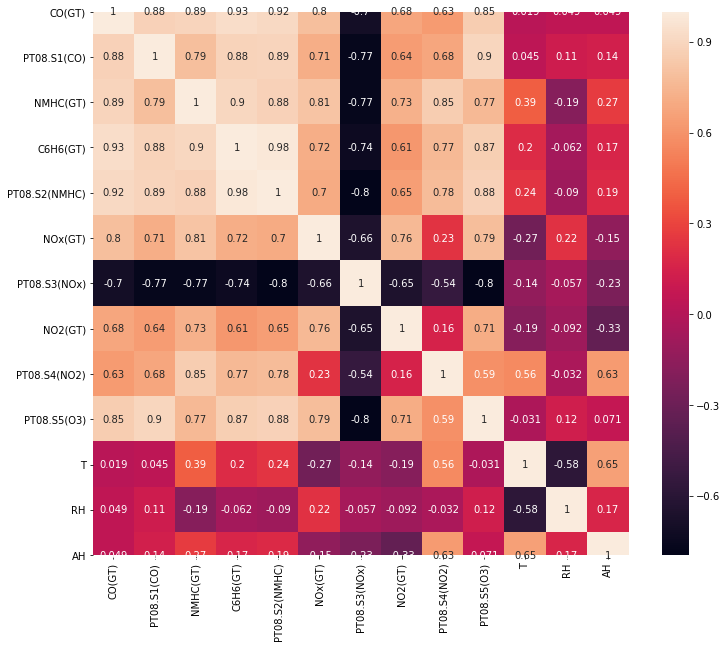

In [16]:
#after withhout removing the outliers from the dataset
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True)

In [17]:
#after removing the outliers now finding out the missing values
data.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 380
RH                366
AH                366
dtype: int64

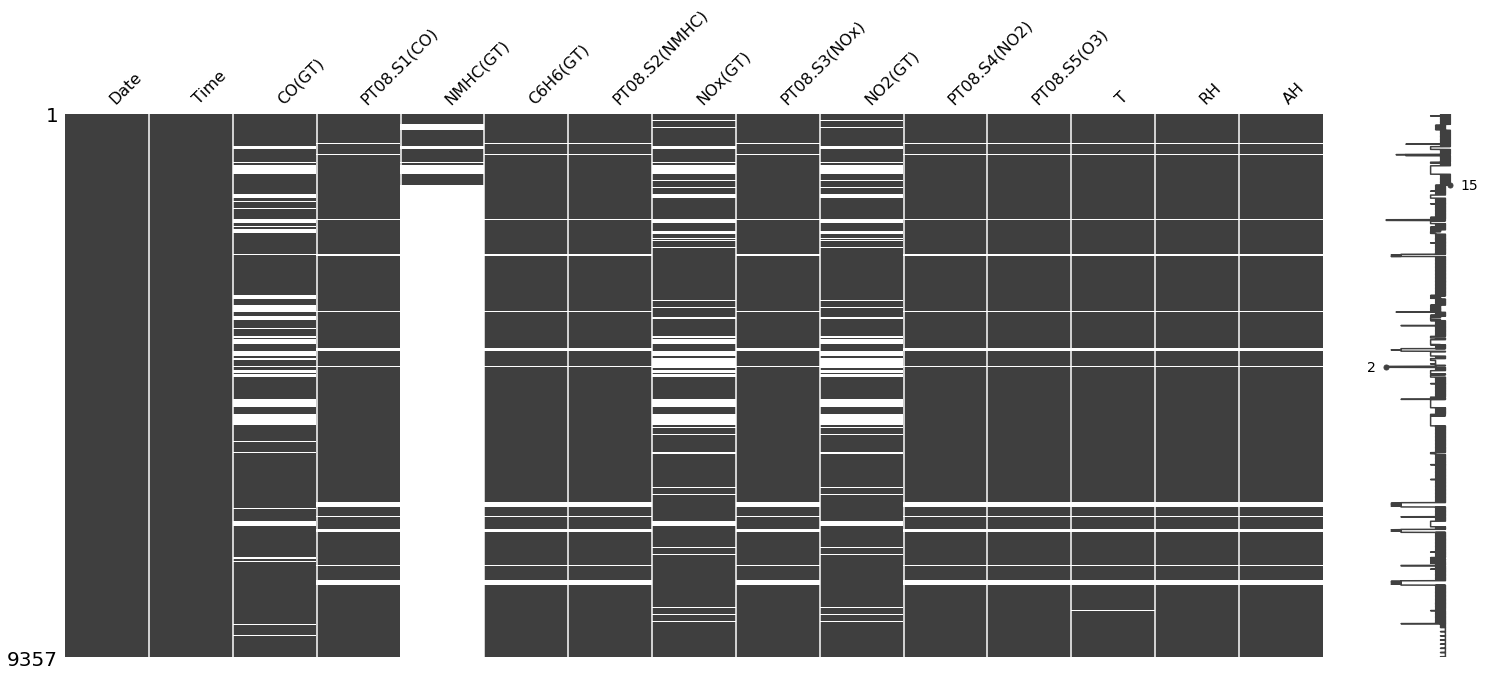

In [18]:
#using missing no matrix
import missingno as msno
msno.matrix(data)

In [19]:
#where there are white gaps are considered as missing values

In [20]:
##now filling the missing values by the median of the pativular column
data["CO(GT)"].fillna((data["CO(GT)"].median()), inplace=True)
data["PT08.S1(CO)"].fillna((data["PT08.S1(CO)"].median()), inplace=True)
data["NMHC(GT)"].fillna((data["NMHC(GT)"].median()), inplace=True)
data["C6H6(GT)"].fillna((data["C6H6(GT)"].median()), inplace=True)
data["PT08.S2(NMHC)"].fillna((data["PT08.S2(NMHC)"].median()), inplace=True)
data["NOx(GT)"].fillna((data["NOx(GT)"].median()), inplace=True)
data["PT08.S3(NOx)"].fillna((data["PT08.S3(NOx)"].median()), inplace=True)
data["NO2(GT)"].fillna((data["NO2(GT)"].median()), inplace=True)
data["PT08.S4(NO2)"].fillna((data["PT08.S4(NO2)"].median()), inplace=True)
data["PT08.S5(O3)"].fillna((data["PT08.S5(O3)"].median()), inplace=True)
data["T"].fillna((data["T"].median()), inplace=True)
data["RH"].fillna((data["RH"].median()), inplace=True)
data["AH"].fillna((data["AH"].median()), inplace=True)


In [21]:
data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

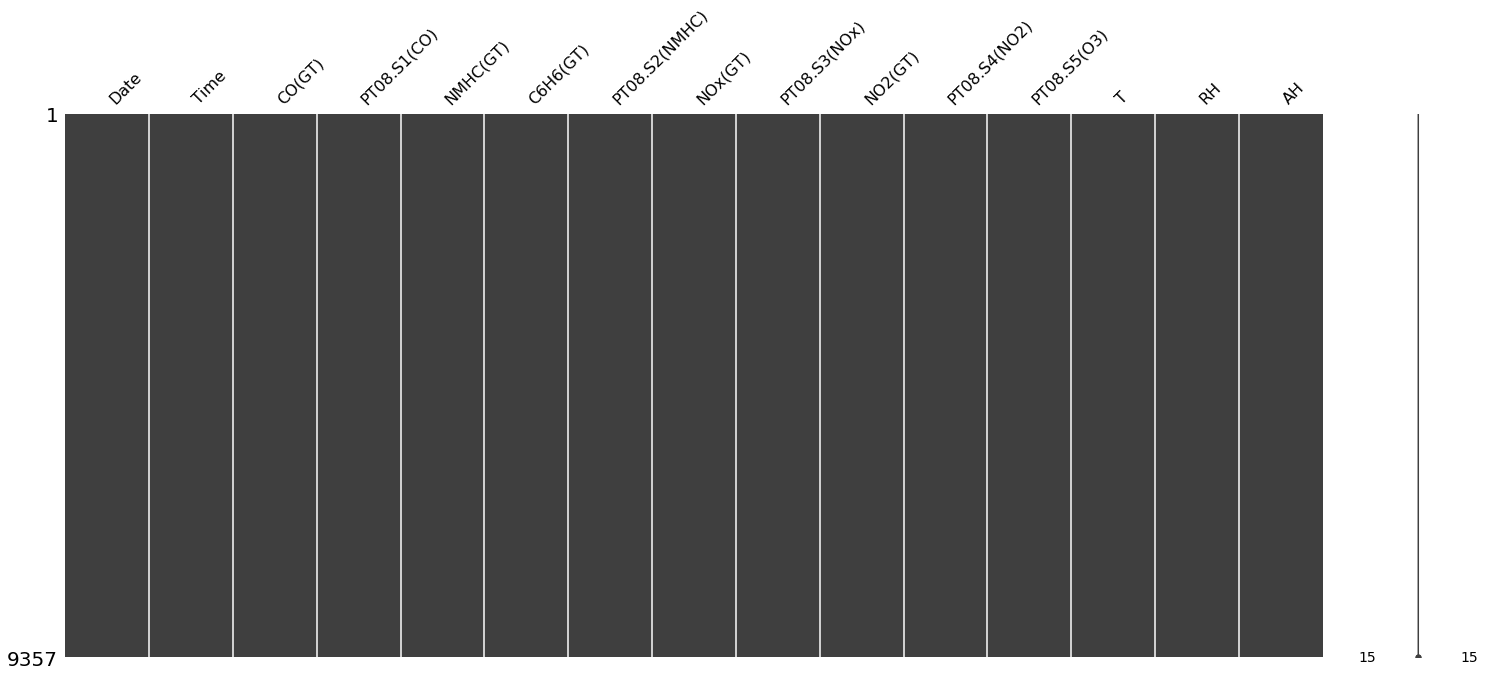

In [22]:
#checking it after fill values with median
import missingno as msno
msno.matrix(data)

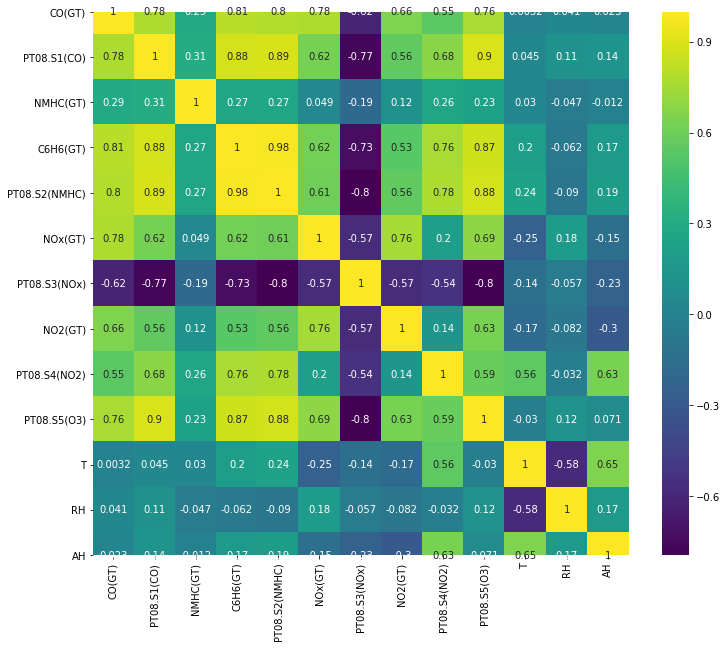

In [23]:
#after filling the  missing values
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,cmap='viridis')

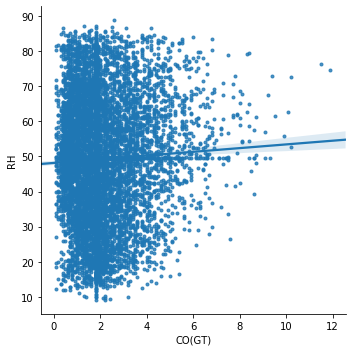

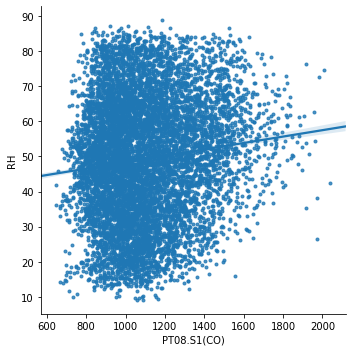

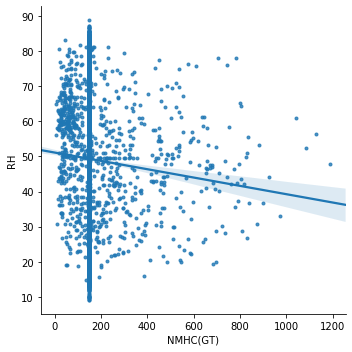

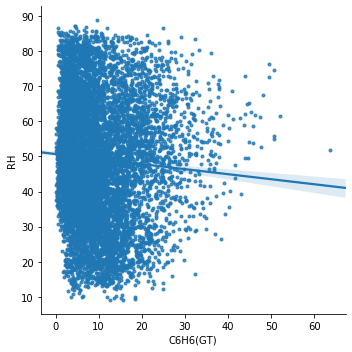

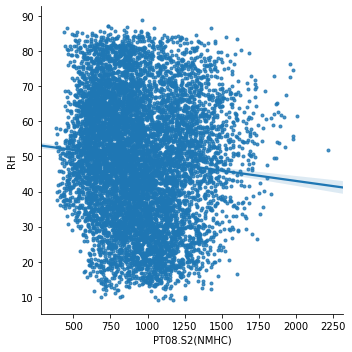

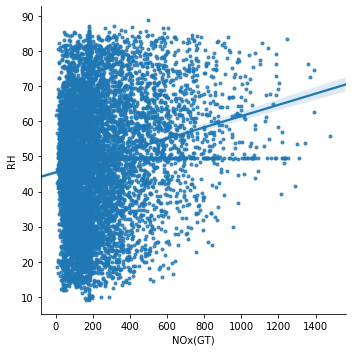

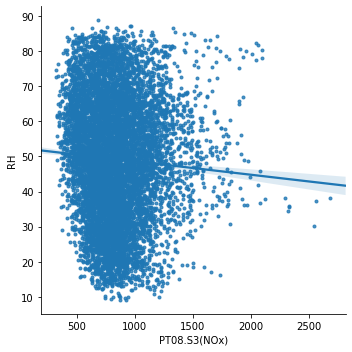

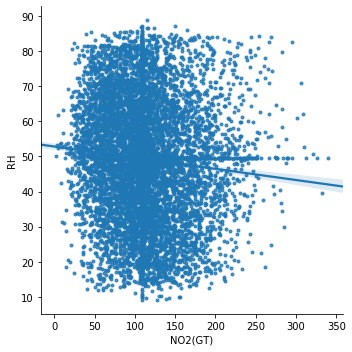

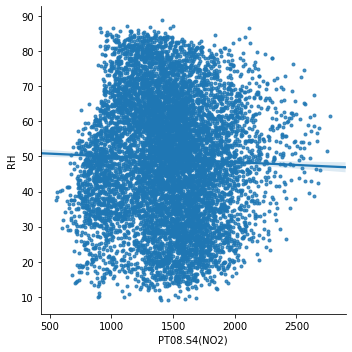

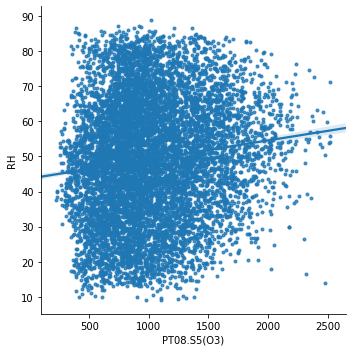

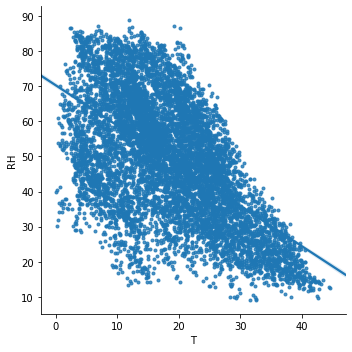

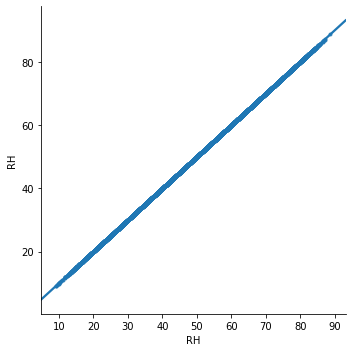

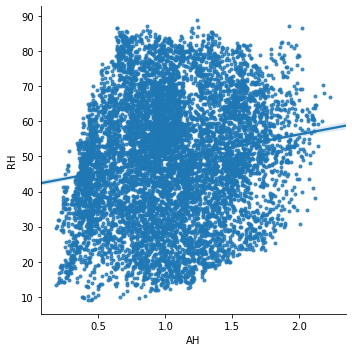

In [24]:
#checking the linearity of the output and the input columns

col_=data.columns.tolist()[2:]
for i in data.columns.tolist()[2:]:
    
    sns.lmplot(x=i,y='RH',data=data,markers='.')

### TRAINING THE MODEL

After loading  and cleaning the data the next step is to Train the dataset for prediction
The methods going to train the model is
  - LinearREgression
  - RandomForest
  - DecisionTree
   

In [25]:
#first consider the input and the output columns 
X=data[col_].drop("RH",1)
y=data["RH"]

In [26]:
#Applying Standard Scaler in the model
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [27]:
#fitting the data set
X_std=sc.fit_transform(X)
X_std

array([[ 0.38602857,  1.22932554, -0.10024072, ...,  0.6322262 ,
        -0.54740851, -0.67346846],
       [-0.06750209,  0.91110658, -0.66694332, ..., -0.12335538,
        -0.58218236, -0.7549785 ],
       [ 0.0836748 ,  1.42659781, -1.02486074, ...,  0.13703556,
        -0.74446035, -0.69245194],
       ...,
       [ 0.23485168,  0.2053885 , -0.10024072, ...,  0.18309981,
         0.99423249, -0.96929461],
       [ 0.00808636, -0.44983726, -0.10024072, ..., -0.64157814,
         1.15940833, -1.28956845],
       [ 0.0836748 , -0.12926982, -0.10024072, ..., -0.52321862,
         1.17969316, -1.31751337]])

In [28]:
#split the data into train and test with test size and 30% and train size as 70%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.3, random_state=30)

In [29]:
X_train


array([[-0.89897495,  1.0684547 , -0.10024072, ...,  0.96491242,
        -1.34430941, -0.62268747],
       [-0.59662118, -0.21381508, -0.10024072, ..., -0.5475303 ,
        -0.80821245,  0.12561909],
       [ 2.57809339,  3.28072234,  2.67361934, ...,  1.6865856 ,
        -0.68650392, -0.27130152],
       ...,
       [ 0.38602857,  1.17531051,  2.06217706, ...,  0.08457351,
        -0.54451068,  0.12689825],
       [-0.21867897, -0.40873887, -0.10024072, ..., -0.26346746,
         0.10170349,  2.26124202],
       [ 0.23485168,  0.14197956, -0.10024072, ...,  0.07497679,
        -0.07506363,  0.22315496]])

In [30]:
y_train

7617    78.674999
6968    80.075001
110     63.875001
623     42.750000
3028    27.325000
          ...    
4859    52.474999
919     56.225000
500     69.200001
4517    87.174999
5925    55.525000
Name: RH, Length: 6549, dtype: float64

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6549, 12)
(2808, 12)
(6549,)
(2808,)


## LINEAR REGRESSION

In [32]:
#importing LinearRegression algorithm
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [33]:
#fitting the model into th =e training data
lr_model=lr.fit(X_train,y_train)

In [34]:
#finding out intercept and the slope of the model
print('Intercept:',lr_model.intercept_)
print('--------------------------------')
print('Slope:')
list(zip(X.columns.tolist(),lr_model.coef_))

Intercept: 49.222328234307376
--------------------------------
Slope:


[('CO(GT)', -0.9173999549325367),
 ('PT08.S1(CO)', 2.3176323277413378),
 ('NMHC(GT)', -0.19916449611116532),
 ('C6H6(GT)', -4.399691535811749),
 ('PT08.S2(NMHC)', -0.6281084396370147),
 ('NOx(GT)', 2.939677232219961),
 ('PT08.S3(NOx)', -0.1972003619944458),
 ('NO2(GT)', -1.4497967392955138),
 ('PT08.S4(NO2)', 4.672327404830174),
 ('PT08.S5(O3)', -0.4644334570900912),
 ('T', -19.76570699862395),
 ('AH', 13.367901823570152)]

In [35]:
y_test_predlr=lr.predict(X_test)# predicting the test data
y_test_predlr

array([61.35700099, 45.24908739, 68.19131023, ..., 40.28167299,
       31.071772  , 65.27335384])

In [36]:
y_train_predlr=lr.predict(X_train)# predicting the traing data
y_train_predlr

array([65.89778067, 66.82300104, 66.21295986, ..., 65.67828111,
       80.41256012, 54.51340966])

In [37]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
rmse=np.sqrt(mean_squared_error(y_test,y_test_predlr))      #calculate rmse for testing data
a=print('Baseline RMSE of model:',rmse)

Baseline RMSE of model: 6.090169023141622


In [38]:
rmse=np.sqrt(mean_squared_error(y_train,y_train_predlr))      #calculate rmse for training data
a1=print('Baseline RMSE of model:',rmse)

Baseline RMSE of model: 5.944883527604205


In [39]:
## checking testing r2_score,mean_absoulte_error_mean_squaed_error
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('R^2:',r2_score(y_test,y_test_predlr))
print("Adjuted R^2:",1-(1-r2_score(y_test,y_test_predlr))*(len(X_test)-1)/
     (len(X_test)-X_test.shape[1]-1))
print("MAE:",mean_absolute_error(y_test,y_test_predlr))
print("MSE:",mean_squared_error(y_test,y_test_predlr))

R^2: 0.8707115916780975
Adjuted R^2: 0.8701565072774311
MAE: 4.638266119257476
MSE: 37.090158730433785


## DECISION TREE REGRESSION

In [40]:
from sklearn.tree import DecisionTreeRegressor         #Decision tree regression model
from sklearn.model_selection import cross_val_score   #import cross validation score pack

In [41]:
dtr=DecisionTreeRegressor()
dtr_model=dtr.fit(X_train,y_train)

In [42]:
y_test_preddr=dtr_model.predict(X_test)  #predicting the values for the test data
y_test_preddr

array([64.625     , 41.27500057, 82.05000114, ..., 33.97499943,
       31.17500019, 82.60000038])

In [43]:
y_train_preddr=dtr_model.predict(X_train)  #predicting the values for training data
y_train_preddr 

array([78.67499924, 80.07500076, 63.87500095, ..., 69.20000076,
       87.17499924, 55.52499962])

In [44]:
#calculate RMSE
b=print('RMSE of Decision Tree Regression:',np.sqrt(mean_squared_error(y_test_preddr,y_test)))  #for test data


RMSE of Decision Tree Regression: 1.599628351142212


In [45]:
#calculate RMSE
b1=print('RMSE of Decision Tree Regression:',np.sqrt(mean_squared_error(y_train_preddr,y_train))) # for traing data

RMSE of Decision Tree Regression: 5.3193845540788284e-08


In [46]:
## checking testing r2_score,mean_absoulte_error_mean_squaed_error
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('R^2:',r2_score(y_test,y_test_preddr))
print("Adjuted R^2:",1-(1-r2_score(y_test,y_test_preddr))*(len(X_test)-1)/
     (len(X_test)-X_test.shape[1]-1))
print("MAE:",mean_absolute_error(y_test,y_test_preddr))
print("MSE:",mean_squared_error(y_test,y_test_preddr))


R^2: 0.9910805293145156
Adjuted R^2: 0.9910422346282094
MAE: 0.9388384590914189
MSE: 2.558810861777952


# RANDOM FOREST REGRESSOR

In [47]:
from sklearn.ensemble import RandomForestRegressor           #import random forest regressor
rf=RandomForestRegressor()

In [48]:
rf_model=rf.fit(X_train,y_train)
rf_model

RandomForestRegressor()

In [49]:
y_test_predrf=rf_model.predict(X_test)  #predicting the values for the test data
y_test_predrf

array([65.40150045, 41.24575028, 80.3612508 , ..., 34.40824977,
       30.88749989, 83.0439994 ])

In [50]:
y_train_predrf=rf_model.predict(X_train)  #predicting the values for training data
y_train_predrf 

array([79.02649977, 79.96175041, 64.11850073, ..., 69.26700058,
       84.66549938, 55.61466646])

In [51]:
#Calculate RMSE
c=print('RMSE of predicted RH in RF model:',np.sqrt(mean_squared_error(y_test,y_test_predrf))) # for test data

RMSE of predicted RH in RF model: 0.9336167334100943


In [52]:
#Calculate RMSE
c1=print('RMSE of predicted RH in RF model:',np.sqrt(mean_squared_error(y_train,y_train_predrf))) # for test data

RMSE of predicted RH in RF model: 0.28402607896404986


In [53]:
## checking testing r2_score,mean_absoulte_error_mean_squaed_error

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('R^2:',r2_score(y_test,y_test_predrf))
print("Adjuted R^2:",1-(1-r2_score(y_test,y_test_predrf))*(len(X_test)-1)/
     (len(X_test)-X_test.shape[1]-1))
print("MAE:",mean_absolute_error(y_test,y_test_predrf))
print("MSE:",mean_squared_error(y_test,y_test_predrf))

R^2: 0.9969616475480635
Adjuted R^2: 0.9969486027432609
MAE: 0.4198281884538304
MSE: 0.871640204903335


## GridSearchCv

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
def rmse(predictions, targets): 
    return np.sqrt(((predictions - targets) ** 2).mean())

In [56]:
from sklearn.metrics import make_scorer
scoring = make_scorer(rmse)
g_cv = GridSearchCV(DecisionTreeRegressor(random_state=0),
              param_grid={'min_samples_split': range(2, 10)},
              scoring=scoring, cv=5, refit=True)


In [57]:
grid_model=g_cv.fit(X_train, y_train)
grid_model

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'min_samples_split': range(2, 10)},
             scoring=make_scorer(rmse))

In [58]:
g_cv.best_params_

{'min_samples_split': 9}

In [59]:
result = g_cv.cv_results_
result

{'mean_fit_time': array([0.04887571, 0.04139104, 0.04128809, 0.03828125, 0.03851166,
        0.0373806 , 0.03819704, 0.03660083]),
 'std_fit_time': array([0.00704849, 0.00042983, 0.00175224, 0.00136978, 0.00130794,
        0.00157736, 0.00104166, 0.00039619]),
 'mean_score_time': array([0.00099816, 0.00079284, 0.00098977, 0.00140271, 0.00099492,
        0.00201278, 0.00100222, 0.0008049 ]),
 'std_score_time': array([1.64905705e-06, 7.45798340e-04, 1.83099260e-05, 4.95922992e-04,
        3.52666132e-06, 1.57044320e-03, 6.27683568e-04, 4.02642748e-04]),
 'param_min_samples_split': masked_array(data=[2, 3, 4, 5, 6, 7, 8, 9],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'min_samples_split': 2},
  {'min_samples_split': 3},
  {'min_samples_split': 4},
  {'min_samples_split': 5},
  {'min_samples_split': 6},
  {'min_samples_split': 7},
  {'min_samples_split': 8},
  {'min_samples_split': 9}],
 'spli

In [60]:
y_pred_grid=grid_model.predict(X_test) # For Testing data 
y_pred_grid

array([63.5062499 , 41.11666695, 80.13928604, ..., 33.18749984,
       31.36249995, 82.71874952])

In [61]:
y_pred_traingrid=grid_model.predict(X_train) #for training data
y_pred_traingrid

array([77.45416673, 80.33125019, 63.77142865, ..., 69.02857154,
       83.72000008, 54.85625017])

In [62]:
#calculate RMSE
print('RMSE of GridSearch Regression:',np.sqrt(mean_squared_error(y_pred_grid,y_test)))

RMSE of GridSearch Regression: 1.3475439415357604


In [63]:
#calculate RMSE
print('RMSE of GridSearch Regression:',np.sqrt(mean_squared_error(y_pred_traingrid,y_train)))

RMSE of GridSearch Regression: 0.6951434233828186


In [64]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('R^2:',r2_score(y_test,y_pred_grid))
print("Adjuted R^2:",1-(1-r2_score(y_test,y_pred_grid))*(len(X_test)-1)/
     (len(X_test)-X_test.shape[1]-1))
print("MAE:",mean_absolute_error(y_test,y_pred_grid))
print("MSE:",mean_squared_error(y_test,y_pred_grid))

R^2: 0.9936702469227052
Adjuted R^2: 0.9936430708808707
MAE: 0.9459077480663457
MSE: 1.815874674369733


## comparing the RMSE VALUE

Text(0.5, 1.0, 'RSME Value comparision')

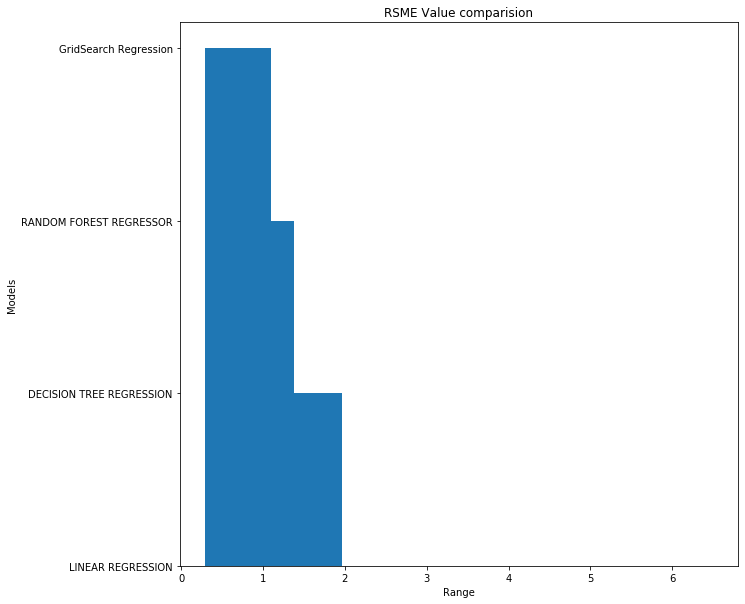

In [65]:
x=[6.090169023141622,1.5637752690060125,0.977452852415959,0.6951434233828186]
y=["LINEAR REGRESSION","DECISION TREE REGRESSION","RANDOM FOREST REGRESSOR","GridSearch Regression"]
plt.figure(figsize=(10,10))
plt.bar(x,y)
plt.xlabel("Range")
plt.ylabel("Models")S
plt.title("RSME Value comparision")

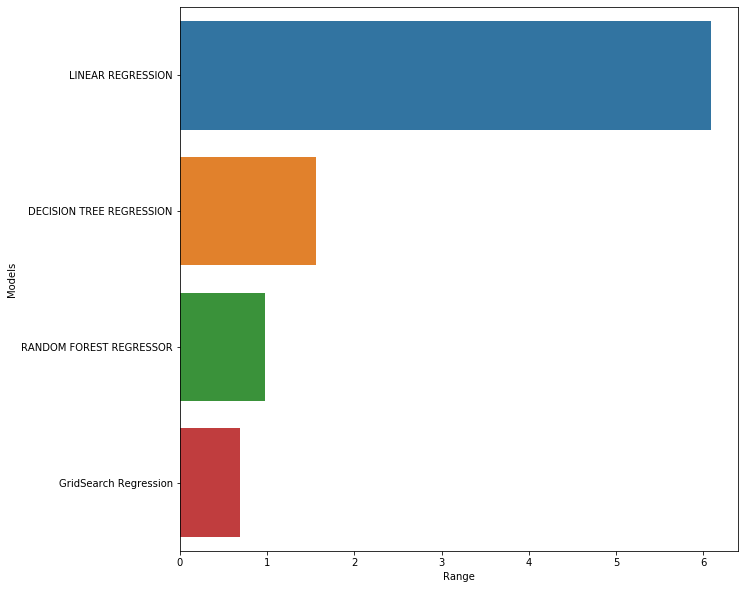

In [66]:
#barplot of the rmse values
plt.figure(figsize=(10,10))
plt.xlabel("Range")
plt.ylabel("Models")
sns.barplot(x,y)

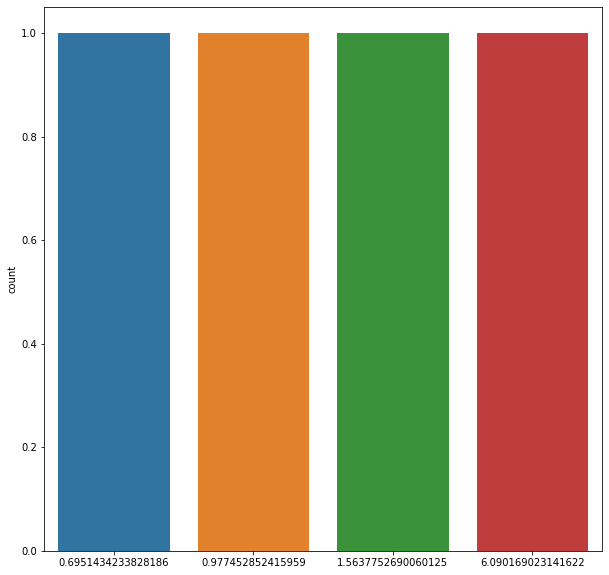

In [67]:
#countplot of the rmse values
plt.figure(figsize=(10,10))
sns.countplot(x)

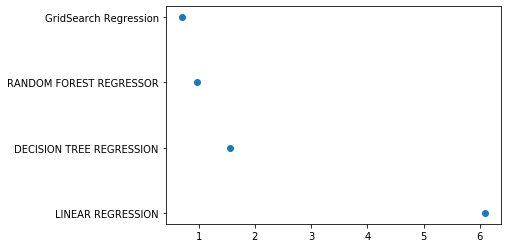

In [68]:
#by visualizing with scatter plot
plt.scatter(x,y) 
plt.show()